# 초음파 광물 실험 결과 따라하고 그래프 그리기

In [1]:
import numpy as np
import tensorflow as tf

seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename, header=None)

Saving sonar.csv to sonar.csv


In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(df[60].values)
X = df.iloc[:, :-1].values

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, stratify=y_encoded, random_state=seed
)
X_train.shape, X_test.shape

((156, 60), (52, 60))

### 1. 은닉층 갯수: 0

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model0 = Sequential()
model0.add(Dense(1, input_dim=60, activation='sigmoid'))

In [12]:
model0.compile(loss='binary_crossentropy',
               optimizer='adam', metrics=['accuracy'])

In [13]:
history0 = model0.fit(X_train, y_train, batch_size=10, epochs=200, verbose=0)

In [14]:
acc_train = model0.evaluate(X_train, y_train)[1]
acc_test = model0.evaluate(X_test, y_test)[1]
print(f'Train Accuracy: {acc_train:.4f}, Test Accuracy: {acc_test:.4f}')

2/2 [==============================] - 0s 2ms/step - loss: 0.5192 - accuracy: 0.7885
Train Accuracy: 0.8013, Test Accuracy: 0.7885


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

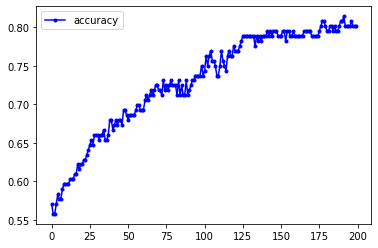

In [25]:
y_acc=history0.history['accuracy']

x_len = np.arange(len(y_acc))
plt.plot(x_len, y_acc, "o-", c="blue", markersize=3, label='accuracy')
plt.legend()
plt.show()

### 은닉층 갯수: 2

In [29]:
model2 = Sequential()
model2.add(Dense(30, input_dim=60, activation='relu'))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [30]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history2 = model2.fit(X_train, y_train, batch_size=10, epochs=200, verbose=0)

In [31]:
acc_train = model2.evaluate(X_train, y_train)[1]
acc_test = model2.evaluate(X_test, y_test)[1]
print(f'Train Accuracy: {acc_train:.4f}, Test Accuracy: {acc_test:.4f}')

2/2 [==============================] - 0s 4ms/step - loss: 0.6782 - accuracy: 0.8462
Train Accuracy: 1.0000, Test Accuracy: 0.8462


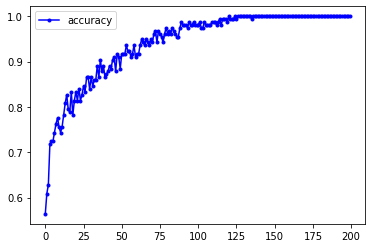

In [32]:
y_acc=history2.history['accuracy']

x_len = np.arange(len(y_acc))
plt.plot(x_len, y_acc, "o-", c="blue", markersize=3, label='accuracy')
plt.legend()
plt.show()

### 3. 은닉층 갯수: 3

In [50]:
model3 = Sequential()
model3.add(Dense(48, input_dim=60, activation='relu'))
model3.add(Dense(16, activation='relu'))
model3.add(Dense(4, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

In [51]:
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history3 = model3.fit(X_train, y_train, batch_size=10, epochs=200, verbose=0)

In [52]:
acc_train = model3.evaluate(X_train, y_train)[1]
acc_test = model3.evaluate(X_test, y_test)[1]
print(f'Train Accuracy: {acc_train:.4f}, Test Accuracy: {acc_test:.4f}')

2/2 [==============================] - 0s 4ms/step - loss: 0.8531 - accuracy: 0.8654
Train Accuracy: 1.0000, Test Accuracy: 0.8654


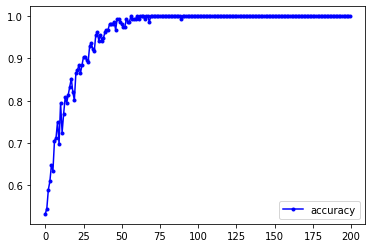

In [53]:
y_acc=history3.history['accuracy']

x_len = np.arange(len(y_acc))
plt.plot(x_len, y_acc, "o-", c="blue", markersize=3, label='accuracy')
plt.legend()
plt.show()

### 4. 은닉층 갯수: 6

In [81]:
model6 = Sequential()
model6.add(Dense(80, input_dim=60, activation='relu'))
model6.add(Dense(48, activation='relu'))
model6.add(Dense(32, activation='relu'))
model6.add(Dense(20, activation='relu'))
model6.add(Dense(12, activation='relu'))
model6.add(Dense(4, activation='relu'))
model6.add(Dense(1, activation='sigmoid'))

In [82]:
model6.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history6 = model6.fit(X_train, y_train, batch_size=10, epochs=200, verbose=0)

In [83]:
acc_train = model6.evaluate(X_train, y_train)[1]
acc_test = model6.evaluate(X_test, y_test)[1]
print(f'Train Accuracy: {acc_train:.4f}, Test Accuracy: {acc_test:.4f}')

2/2 [==============================] - 0s 3ms/step - loss: 1.0355 - accuracy: 0.8654
Train Accuracy: 1.0000, Test Accuracy: 0.8654


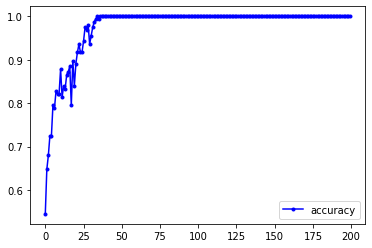

In [84]:
y_acc=history6.history['accuracy']

x_len = np.arange(len(y_acc))
plt.plot(x_len, y_acc, "o-", c="blue", markersize=3, label='accuracy')
plt.legend()
plt.show()